In [2]:
%load_ext autoreload
%autoreload 2
    

In [83]:
from src.analysis.corr import run_corr_analysis
from src.analysis.preprocessing import preprocessing
from src.data.get import from_parquet_to_df_ticker_overview, from_parquet_to_df_ticker_overview_yf
import pandas as pd

TICKER="PL"

ticker_overview_df = from_parquet_to_df_ticker_overview("2025-09-18")
ticker_overview_yf_df = from_parquet_to_df_ticker_overview_yf("2025-09-20")
df = preprocessing(target_col="c")

corr_result = run_corr_analysis(df, ticker=TICKER, days=50, top=20)
corr_df = corr_result.rename_axis("Ticker").reset_index(name="Value")
ticker_overview_yf_df['Ticker'] = ticker_overview_yf_df['Ticker'].str.upper().str.strip()
merged_df = pd.merge(corr_df, ticker_overview_yf_df.reset_index(), on="Ticker", how="left")

ticker_overview_yf_df
# corr_df

[Errno 2] No such file or directory: 'src/data/cached/OHLC/ohlc_2025-09-19.parquet'


,Ticker,industry,industryDisp,sector,sectorDisp,beta,marketCap
0,CISS,Marine Shipping,Marine Shipping,Industrials,Industrials,1.699,None
1,WLDN,Engineering & Construction,Engineering & Construction,Industrials,Industrials,1.305,None
2,BCBP,Banks - Regional,Banks - Regional,Financial Services,Financial Services,0.740,None
3,PGR,Insurance - Property & Casualty,Insurance - Property & Casualty,Financial Services,Financial Services,0.325,None
4,LGVN,Biotechnology,Biotechnology,Healthcare,Healthcare,0.178,None
...,...,...,...,...,...,...,...
5289,MGM,Resorts & Casinos,Resorts & Casinos,Consumer Cyclical,Consumer Cyclical,1.692,None
5290,NGVT,Specialty Chemicals,Specialty Chemicals,Basic Materials,Basic Materials,1.449,None
5291,AIIO,Auto Manufacturers,Auto Manufacturers,Consumer Cyclical,Consumer Cyclical,1.483,None
5292,GM,Auto Manufacturers,Auto Manufacturers,Consumer Cyclical,Consumer Cyclical,1.317,None


In [84]:
# target_ticker = ticker_overview_yf_df.loc[TICKER]
target_df = ticker_overview_yf_df.query("Ticker == @TICKER").drop(columns=['beta', 'marketCap'])
merged_df['score'] = merged_df['Value']
final_df = merged_df.drop(columns=['beta', 'marketCap'])

for col in target_df.columns:
    val = target_df[col].iloc[0]
    mask = final_df[col].eq(val)
    final_df.loc[mask, 'score'] *= 1.1

In [85]:
target_df

,Ticker,industry,industryDisp,sector,sectorDisp
4628,PL,Aerospace & Defense,Aerospace & Defense,Industrials,Industrials


In [86]:
final_df.sort_values(by="score", ascending=False)

,Ticker,Value,index,industry,industryDisp,sector,sectorDisp,score
0,CPNG,0.659087,3952,Internet Retail,Internet Retail,Consumer Cyclical,Consumer Cyclical,0.659087
1,HOOD,0.640749,2620,Capital Markets,Capital Markets,Financial Services,Financial Services,0.640749
2,GSAT,0.601193,882,Telecom Services,Telecom Services,Communication Services,Communication Services,0.601193
3,LIF,0.561477,1181,Software - Application,Software - Application,Technology,Technology,0.561477
4,MIAX,0.556142,664,Capital Markets,Capital Markets,Financial Services,Financial Services,0.556142
5,WAY,0.554273,4725,Health Information Services,Health Information Services,Healthcare,Healthcare,0.554273
6,MBOT,0.547605,780,Medical Instruments & Supplies,Medical Instruments & Supplies,Healthcare,Healthcare,0.547605
7,CRVL,0.541755,514,Insurance Brokers,Insurance Brokers,Financial Services,Financial Services,0.541755
8,XPEL,0.533835,1446,Auto Parts,Auto Parts,Consumer Cyclical,Consumer Cyclical,0.533835
9,SPHR,0.532197,4724,Entertainment,Entertainment,Communication Services,Communication Services,0.532197


In [87]:
ticker_overview_yf_df['sector'].unique()

array(['Industrials', 'Financial Services', 'Healthcare', None,
       'Technology', 'Consumer Defensive', 'Communication Services',
       'Energy', 'Consumer Cyclical', 'Utilities', 'Basic Materials',
       'Real Estate', ''], dtype=object)

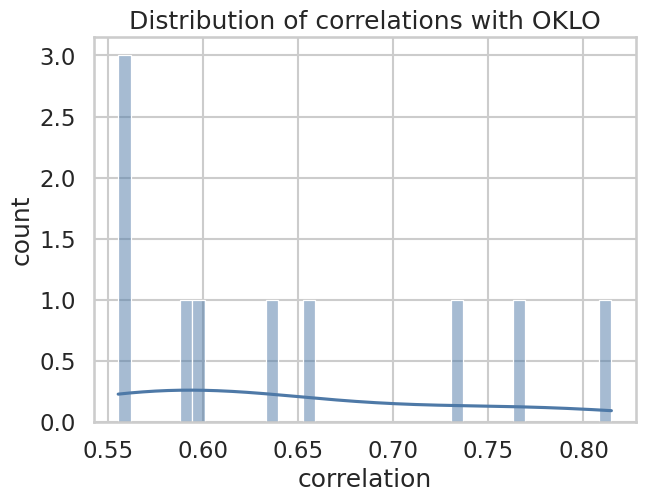

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(7,5))
sns.histplot(corr_result, bins=40, kde=True, color="#4e79a7")
plt.title(f"Distribution of correlations with {TICKER}")
plt.xlabel("correlation")
plt.ylabel("count")
plt.show()

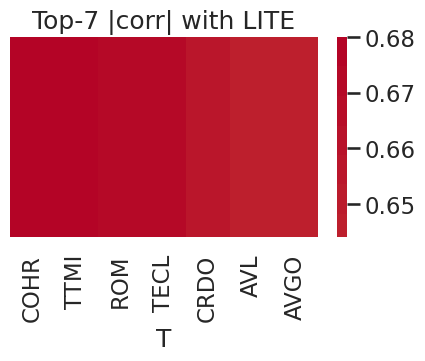

In [14]:
topK = 7
hot = corr_result.abs().sort_values(ascending=False).head(topK).sort_values(ascending=False)
plt.figure(figsize=(min(20, 0.28*len(hot)+3), 2.6))
sns.heatmap(hot.to_frame(name="corr").T, cmap="coolwarm", center=0, cbar=True)
plt.title(f"Top-{topK} |corr| with {TICKER}")
plt.yticks([])
plt.show()

NameError: name 'base' is not defined

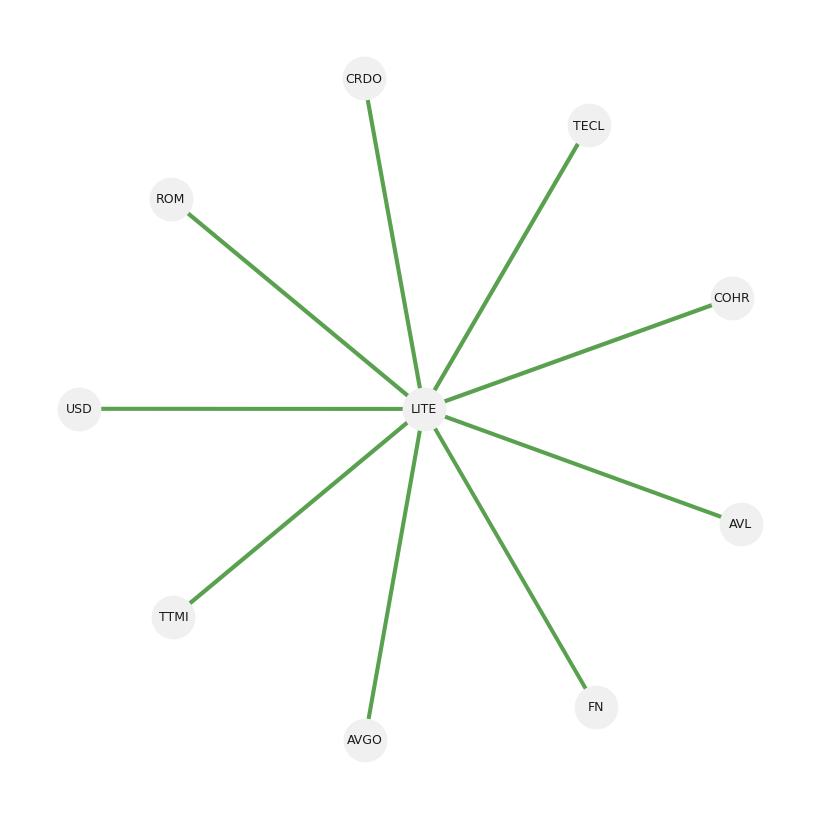

In [15]:
import networkx as nx
thr = 0.6 # 필요에 맞게 조정
sel = corr_result[corr_result.abs() >= thr]
if len(sel) > 0:
    G = nx.Graph()
    G.add_node(TICKER)
    for t, v in sel.items():
        G.add_edge(TICKER, t, weight=abs(v), sign="pos" if v>=0 else "neg")

    pos_xy = nx.spring_layout(G, seed=42)
    edge_colors = ["#59a14f" if G[u][v]["sign"]=="pos" else "#e15759" for u,v in G.edges()]
    edge_widths = [1.0 + 3.0*G[u][v]["weight"] for u,v in G.edges()]
    plt.figure(figsize=(8,8))
    nx.draw(G, pos_xy, with_labels=True, node_color="#f0f0f0",
            node_size=900, font_size=9, edge_color=edge_colors, width=edge_widths)
    plt.title(f"Network (|corr| ≥ {thr}) centered on {base}")
    plt.show()
else:
    print(f"No tickers with |corr| ≥ {thr}")